<a href="https://colab.research.google.com/github/losvaldote/Python_Club_for_Physicist/blob/main/Ejercicio_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 3 v1**
# **Luis Osvaldo Téllez Tovar**



## a) Calcular la fuerza.
Definamos las constantes necesarias.

In [ ]:
# Vamos a importar las bibliotecas necesarias.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
k = 8.99e9 # k = 1/4pi\epsilon_0. Unidades N m^2 / C^2
Z = 50.0
Z_1 = Z -2.0
Z_2 = 2.0
e = 1.602176e-19 # En Coulombs
R = 2.0e-15*pow(Z_1,1.0/3.0) # En metros

Definamos el potencial que será la función a derivar.

In [ ]:
def V_r(x):
  return(Z_1*Z_2*k*e**2.0/x)

Para calcular la fuerza necesitamos derivar el potencial, para esto definiremos los algoritmos de los tres esquemas de diferencias finitas.

In [ ]:
 # f : funcion a derivar.
 # a : punto en donde se quiere conocer la derivada.
 # h : tamanio del paso.

 def derivative(f,a,h,method): #Metodo de punto central es el mas recomendable 
    if method == 'centrada':
        return (f(a + h) - f(a - h))/(2*h) #Metodo punto central
    elif method == 'adelante':
        return (f(a + h) - f(a))/h         #Metodo punto hacia adelante
    elif method == 'atrás':
        return (f(a) - f(a - h))/h         #Metodo punto hacia atras
    else:
        raise ValueError("Los métodos pueden ser 'centrada', 'adelante' o 'atrás'.")

Queremos conocer la fuerza en el intervalo $[R, 3R]$ que definiremos como:


In [ ]:
N = 100 # numero de pasos.
r = np.linspace(R, 3.0*R, N)

El tamaño del paso, h, necesario para la derivada numérica la definiremos en función del número de pasos que queramos usar. Esto es:

In [ ]:
h = (3.0*R - R)/N
print(h)

1.4536964742657117e-16


Sabemos que la fuerza está dada a partir del potencial como:
$$F = - \frac{dV(x)}{dx}$$

Calculémosla a partir de la función **derivative**, que hemos definido arriba, usando los tres métodos diferentes.

In [ ]:
f_cen = -1.0 * derivative(V_r, r, h, method='centrada')
f_ade = -1.0 * derivative(V_r, r, h, method='adelante')
f_atr = -1.0 * derivative(V_r, r, h, method='atrás')

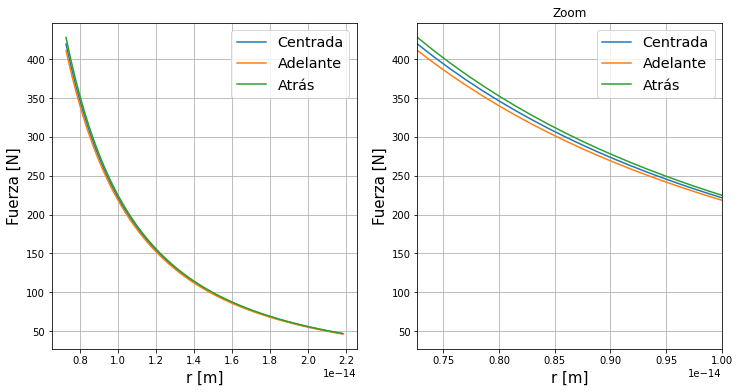

In [ ]:
# Hagamos la grafica para poder comparar las tres aproximaciones.
fig, axs = plt.subplots(1,2,figsize = (12,6))
fig.subplots_adjust(wspace=0.2)

axs[0].plot(r, f_cen, label = 'Centrada')
axs[0].plot(r, f_ade, label = 'Adelante')
axs[0].plot(r, f_atr, label = 'Atrás')
axs[0].set_ylabel('Fuerza [N]', fontsize=15)
axs[0].set_xlabel('r [m]', fontsize=15 )
axs[0].grid()
axs[0].legend(loc = 'best', fontsize = 'x-large')

axs[1].plot(r, f_cen, label = 'Centrada')
axs[1].plot(r, f_ade, label = 'Adelante')
axs[1].plot(r, f_atr, label = 'Atrás')
axs[1].set_ylabel('Fuerza [N]', fontsize=15)
axs[1].set_xlabel('r [m]', fontsize=15 )
#axs[1].set_ylim(350.0, 440.0)
axs[1].set_xlim(R,1.e-14)
axs[1].grid()
axs[1].legend(loc = 'best', fontsize = 'x-large')
axs[1].set_title('Zoom')


plt.show()

En las figuras anteriores hemos graficado la fuerza obtenida con los tres métodos diferentes de derivación. En la figura del lado izquierdo se muestra la fuerza para el dominio completo mientras que en la figura de la derecha se muestra un acercamiento cerca de $R$ para mostrar las diferencias entre los tres métodos.

Podemos ver que el potencial al que está sujeta la partícula $\alpha$ es el potencial de Coulomb, esto significa que una vez que lo atraviesa (efecto túnel) sentirá una fuerza tipo Coulomb. Es decir, que, a medida que la partícula se aleja del núcleo la fuerza debe decaer, a saber, de la forma 1/r^2. Y esto es precisamente lo que se observa en las figuras anteriores.

## b) Comparar con la solución analítica. 

Como ya se mencionó arriba, la fuerza es 
\begin{eqnarray}
    F &=& -\frac{dV}{dr}\\
      &=& -kZ_1Z_2e^2 \frac{d}{dr}\frac{1}{r}\\
      &=& -kZ_1Z_2e^2\left(-\frac{1}{r^2}\right)\\
      &=& kZ_1Z_2e^2\frac{1}{r^2}
\end{eqnarray}

Definamos una función para la defivada analítica y grafiquémosla junto con los resultados numéricos.

In [ ]:
def F_r(x):
  return(Z_1*Z_2*k*e**2.0/x**2)

In [ ]:
# Para ahorrar calculos guardemos el valor de la funcion en el dominio deseado en un arreglo
f_an = F_r(r)

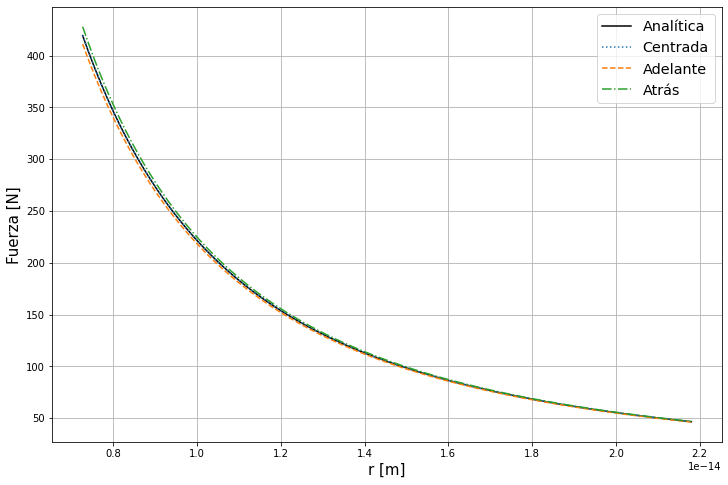

In [ ]:
# Hagamos la grafica para poder comparar las tres aproximaciones.

plt.figure(figsize = (12, 8)) 

plt.plot(r, f_an, 'k', label = 'Analítica')
plt.plot(r, f_cen, linestyle='dotted', label = 'Centrada')
plt.plot(r, f_ade, linestyle='dashed', label = 'Adelante')
plt.plot(r, f_atr, linestyle='dashdot', label = 'Atrás')
plt.ylabel('Fuerza [N]', fontsize=15)
plt.xlabel('r [m]', fontsize=15 )
plt.grid()
plt.legend(loc = 'best', fontsize = 'x-large')

plt.show()

Calculemos los errores absolutos respecto a la función analítica.

In [ ]:
er_cen = np.abs(f_an - f_cen)
er_ade = np.abs(f_an - f_ade)
er_atr = np.abs(f_an - f_atr)


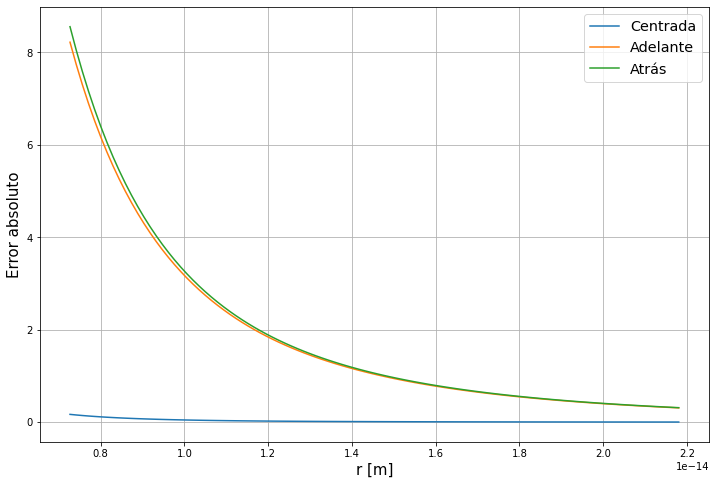

In [ ]:
# Hagamos la grafica para poder comparar las tres aproximaciones.

plt.figure(figsize = (12, 8)) 

plt.plot(r, er_cen, label = 'Centrada')
plt.plot(r, er_ade, label = 'Adelante')
plt.plot(r, er_atr, label = 'Atrás')
plt.ylabel('Error absoluto', fontsize=15)
plt.xlabel('r [m]', fontsize=15 )
plt.grid()
plt.legend(loc = 'best', fontsize = 'x-large')

plt.show()

In [ ]:
#Errores máximos

print(np.max(er_cen),np.max(er_ade),np.max(er_atr))

0.16780219191656442 8.222307403742604 8.557911787575733


Ahora veamos los órdenes de convergencia.

In [ ]:
pasos_l = [] # lista de número de pasos
h_l = []     # lista de tamanios de pasos
er_cen_l = [] 
er_ade_l = []
er_atr_l = []


for i in range(10,10000,100):   # el ciclo se hace sobre el numero de pasos
  h2 = (3.0*R - R)/i            # tamanio del paso que cambia en cada interacion

  x = np.linspace(R,3.0*R ,i) 


  de_c = derivative(V_r,x,h2,method='centrada')
  de_ad = derivative(V_r,x,h2,method='adelante')
  de_at = derivative(V_r,x,h2,method='atrás')

  # tomamos los errores maximos por iteracion sobre el dominio
  c_err=np.max(np.abs(F_r(x)-de_c))
  ad_err=np.max(np.abs(F_r(x)-de_ad))
  at_err=np.max(np.abs(F_r(x)-de_at))
  
  # agregamos el resultado al vector indicado
  er_cen_l.append(c_err)
  er_ade_l.append(ad_err)
  er_atr_l.append(at_err)

  pasos_l.append(i)
  h_l.append(h2)

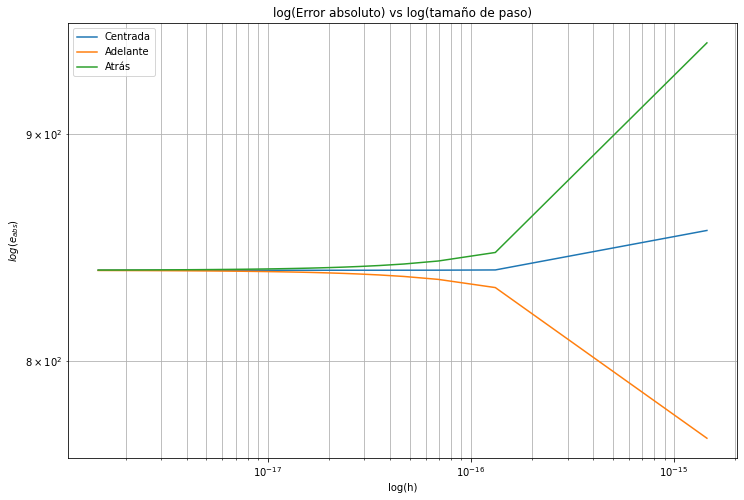

In [ ]:
plt.figure(figsize = (12, 8)) 

# Grafica de errores en escala logaritmica
plt.loglog(h_l,er_cen_l)
plt.loglog(h_l,er_ade_l)
plt.loglog(h_l,er_atr_l)

#plt.plot(h_l,er_cen_l)
#plt.plot(h_l,er_ade_l)
#plt.plot(h_l,er_atr_l)

plt.legend(['Centrada','Adelante','Atrás'])
plt.title('log(Error absoluto) vs log(tamaño de paso)')
plt.xlabel('log(h)')
plt.ylabel('$log(e_{abs})$')
plt.grid(True, which="both", ls="-")
plt.show()

Como se mencionó anteriormente, la fuerza a la que está sujeta la partícula $\alpha$ decae con la distancia como $1/r^2$. Notamos que a simple inspección no hay una diferencia notable entre la fuerza analítica y las obtenidas numéricamente usando los tres métodos de diferencias finitas. Sin embargo, cuando se estudian los errores absolutos se obtiene que el método "Centrada" tiene el error más pequeño comparado con los otros métodos, es decir, se parece más a la fuerza analítica. 

Por otro lado, para los órdenes de convergencia, se hizo el ciclo for respecto del número de pasos. Puesto que el valor de la distancia $r$ es pequeña, obtener el orden $h$ (tamaño del paso) es más fácil una vez conocidos los pasos en que dividiremos el intervalo. De esta forma notamos que el error para el método "Centrada" se mantiene casi igual cuando cambia $h$. Para los métodos "Adelante" y "Atrás" estos se van acercando al de "Centrada" a medida que el tamaño del paso se vuelve más pequeño.